In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import h5py
from scipy.interpolate import CubicSpline
from scipy.io import savemat
from scipy.interpolate import interp1d
from collections import OrderedDict
%matplotlib inline

In [105]:
df = pd.read_parquet("ASMS-nodes.parquet")
df

,S1,S2,S3,S4,S5,S6,S7
0,"[-0.03639629823712, 0.363365523203351, 0.00944...","[-0.5034526715110165, -0.009802872414338193, 0...","[-0.036396298237072994, 0.36336552320324766, 0...","[-0.5034526715111739, -0.009802872414821187, 0...","[-0.03639629823719279, 0.36336552320324716, 0....","[-0.50345267151135, -0.009802872414010233, 0.0...","[0.309860148703232, 0.2001289024144926, 0.0111..."
1,"[0.125366029263795, -0.38030901219380103, 0.01...","[-0.5027962964556788, 0.026548711257379204, 0....","[0.12536602926385115, -0.3803090121939021, 0.0...","[-0.5027962964558499, 0.026548711256896135, 0....","[0.12536602926372917, -0.38030901219390206, 0....","[-0.5027962964560037, 0.026548711257706387, 0....","[0.222725179324661, -0.29403806527514276, 0.01..."
2,"[-0.31602207203862, 0.24499424739325049, 0.012...","[-0.5014842787485148, -0.04610705835327708, 0....","[-0.31602207203857124, 0.24499424739314324, 0....","[-0.5014842787486813, -0.04610705835376142, 0....","[-0.3160220720386931, 0.24499424739314332, 0.0...","[-0.5014842787488606, -0.046107058352951036, 0...","[0.288393980164027, 0.22998652469475944, 0.011..."
3,"[0.31602155815302, 0.2449949092672041, 0.01269...","[-0.49951857561640567, 0.06275817243140552, 0....","[0.3160215581530669, 0.24499490926710454, 0.01...","[-0.4995185756165689, 0.06275817243092197, 0.0...","[0.3160215581529466, 0.24499490926710255, 0.01...","[-0.4995185756167104, 0.06275817243173137, 0.0...","[-0.26894593304058, -0.19767455985425264, 0.00..."
4,"[-0.01819920434875, -0.43458247698438285, 0.01...","[-0.49690138045148047, -0.08217457343870466, 0...","[-0.018199204348694903, -0.43458247698448477, ...","[-0.4969013804516348, -0.08217457343918788, 0....","[-0.0181992043488155, -0.43458247698448405, 0....","[-0.4969013804518366, -0.0821745734383898, 0.0...","[-0.20779172659863, 0.3047744866178807, 0.0111..."
...,...,...,...,...,...,...,...
670,"[0.496901570189443, -0.08181493026818662, 0.02...","[0.49690158931219774, -0.08217333989504622, 0....","[0.49690157018949543, -0.08181493026828443, 0....","[0.49690158931204287, -0.08217333989546345, 0....","[0.49690157018937364, -0.08181493026828501, 0....","[0.4969015893118496, -0.08217333989501019, 0.0...","[-0.18256788461425, -0.06318735921214239, -0.0..."
671,"[0.503452695590093, -0.009443037119758902, 0.0...","[0.49951842452227946, 0.06275941247172559, 0.0...","[0.5034526955901436, -0.009443037119855696, 0....","[0.4995184245221135, 0.06275941247130759, 0.02...","[0.5034526955900238, -0.009443037119857722, 0....","[0.4995184245219696, 0.06275941247176084, 0.02...","[0.070913273371028, 0.14119993643538548, -0.00..."
672,"[0.499518433603219, 0.06311817631832842, 0.023...","[0.5014843980319794, -0.04610581343282774, 0.0...","[0.4995184336032663, 0.06311817631823002, 0.02...","[0.5014843980318191, -0.046105813433245546, 0....","[0.49951843360315007, 0.06311817631822905, 0.0...","[0.501484398031637, -0.04610581343279324, 0.02...","[-0.0835311606936, -0.0900251808139016, -0.003..."
673,"[0.460738174452999, 0.20279117846209022, 0.023...","[0.5027962352913223, 0.026549959434658016, 0.0...","[0.4607381744530491, 0.20279117846199182, 0.02...","[0.502796235291159, 0.0265499594342401, 0.0224...","[0.46073817445292686, 0.20279117846199052, 0.0...","[0.5027962352910057, 0.02654995943469224, 0.02...","[0.069180629682761, 0.10146934741151183, -0.00..."


In [106]:
from dataclasses import dataclass
@dataclass
class CeoKl:
    D: float
    radius2: np.ndarray
    radialFun: np.ndarray
    nv: float
    azimOrder: np.ndarray
    CEO_KL: list

In [107]:
def ceo_modes(filename):

    data = h5py.File(filename,'r')
    print('HDF5 data sets:',list(data.keys()))

    nv = int(data['nv'].value)
    print(' . # of radial function: {0:d}'.format(nv))
    na = int(data['na'].value)
    print(' . azimuth sampling: {0:d}'.format(na))
    nf = int(data['nf'].value)
    print(' . # of modes: {0:d}'.format(nf))
    azimOrder = data['azimOrder'].value
    angle = data['angle'].value[None,:]
    radialFun = data['radialFun'].value
    NRF = np.std(radialFun,1)
    print("Radial function norm: [max,min,mean]:",NRF.max(),NRF.min(),NRF.mean())
    radius2 = data['radius2'].value
    D = data['tel']['D'].value[0]
    data.close()

    Ni = 256
    u = np.linspace(-1,1,Ni)*0.5*1.05
    xi,yi = np.meshgrid(u,u)
    ri2 = np.hypot(xi,yi)**2
    mask = 4*ri2<D
    oi = np.arctan2(yi,xi)

    print('\n * interpolating ...')
    CEO_KL = []
    for k in range(nv):
        print('\r mode #{0:03d}'.format(k),end='')
        rf = interp1d(radius2,radialFun[k,:],kind='cubic',fill_value='extrapolate')(ri2)
        m = azimOrder[k]
        if m==0:
            CEO_KL += [rf]
        else:
            CEO_KL += [rf*np.cos(m*oi),rf*np.sin(m*oi)]

    return CeoKl(D,radius2,radialFun,nv,azimOrder,CEO_KL)

In [108]:
CEO_KL = {'outer':\
          ceo_modes('/home/rconan/Dropbox/rconan/Desktop/CppAOapi/examples/Karhunen-Loeve_Basis_Outer10415.hdf5'),
          'center':\
          ceo_modes('/home/rconan/Dropbox/rconan/Desktop/CppAOapi/examples/Karhunen-Loeve_Basis_Center10503_OC03945.hdf5')}

HDF5 data sets: ['angle', 'atm', 'azimOrder', 'na', 'nf', 'nr', 'nv', 'radialFun', 'radius2', 'star', 'tel', 'varCoef']
 . # of radial function: 511
 . azimuth sampling: 2048
 . # of modes: 1000
Radial function norm: [max,min,mean]: 0.9999999999979869 0.007547693361480036 0.9533704029353189

 * interpolating ...
 mode #031

<ipython-input-107-9beb5fc4be85>:6: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  nv = int(data['nv'].value)
<ipython-input-107-9beb5fc4be85>:8: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  na = int(data['na'].value)
<ipython-input-107-9beb5fc4be85>:10: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  nf = int(data['nf'].value)
<ipython-input-107-9beb5fc4be85>:12: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  azimOrder = data['azimOrder'].value
<ipython-input-107-9beb5fc4be85>:13: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  angle = data['angle'].value[None,:]
<ipython-input-107-9beb5fc4be85>:14: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  radialFun = data['radialFun'].value
<ipython-input-107-9beb5fc4be85>:17: H5pyDeprecationWarning: dataset.value 

 mode #510HDF5 data sets: ['angle', 'atm', 'azimOrder', 'na', 'nf', 'nr', 'nv', 'radialFun', 'radius2', 'star', 'tel', 'varCoef']
 . # of radial function: 507
 . azimuth sampling: 2048
 . # of modes: 1000
Radial function norm: [max,min,mean]: 0.9999999999969068 0.006085998089611685 0.942104531209059

 * interpolating ...
 mode #506

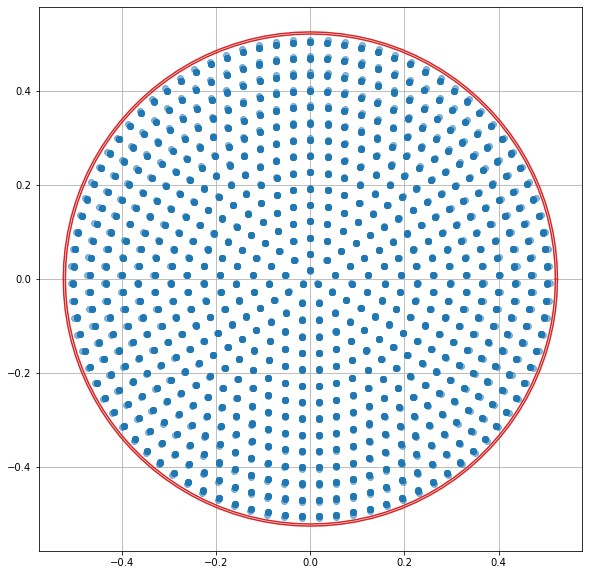

In [109]:
fig,ax = plt.subplots(figsize=(10,10))
for i in range(1,8):
    xyz = np.vstack(df[f'S{i}'])
    ax.plot(xyz[:,0],xyz[:,1],'C0o',alpha=0.5)
o = np.linspace(0,2*np.pi,101)
(xl,yl) = (np.cos(o),np.sin(o))
D = CEO_KL['outer'].D
ax.plot(xl*D/2,yl*D/2,"C3")
D = CEO_KL['center'].D
ax.plot(xl*D/2,yl*D/2,"C3")
ax.set_aspect('equal')
ax.grid()

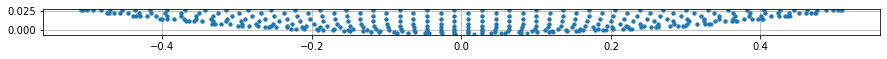

In [110]:
fig,ax = plt.subplots(figsize=(15,10))
ax.plot(xyz[:,1],xyz[:,2],'.')
ax.set_aspect('equal')
ax.grid()

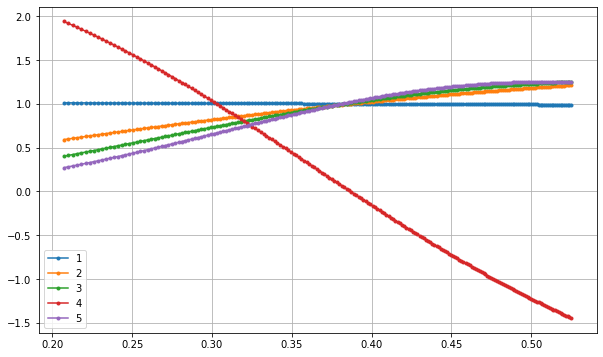

In [111]:
fig,ax=plt.subplots(figsize=(10,6))
ax.plot(np.sqrt(CEO_KL['center'].radius2),CEO_KL['center'].radialFun[:5,:].T,'.-')
ax.grid()
ax.legend(range(1,6))

In [112]:
np.sqrt(CEO_KL['center'].radius2)[-1]*3.6/8.365,np.sqrt(CEO_KL['center'].radius2)[0]

(0.22600597728631203, 0.20717167500000003)

In [113]:
def fem_modes(n, data: CeoKl):
    n = 66
    modes = {f"KL_{i}":[] for i in range(1,8)} 
    for i in range(1,8):
        xyz = np.vstack(df[f'S{i}'])
        xi = xyz[:,0]
        yi = xyz[:,1]
        r2 = xi**2+yi**2
        oi = np.arctan2(yi,xi)
        KL = []
        l = 0
        for k in range(data.nv):
            cs = CubicSpline(data.radius2,data.radialFun[k])
            rf = cs(r2)
            m = data.azimOrder[k]
            if m==0:
                KL += [rf]
                if i==1:
                    data.CEO_KL[l] /= np.sqrt(np.sum(KL[-1]**2))
                l += 1
                KL[-1] /= np.sqrt(np.sum(KL[-1]**2))
            else:
                KL += [rf*np.cos(m*oi),rf*np.sin(m*oi)]
                if i==1:
                    data.CEO_KL[l] /= np.sqrt(np.sum(KL[-2]**2))
                l += 1
                KL[-2] /= np.sqrt(np.sum(KL[-2]**2))
                if i==1:
                    data.CEO_KL[l] /= np.sqrt(np.sum(KL[-1]**2))
                l += 1
                KL[-1] /= np.sqrt(np.sum(KL[-1]**2))
        #L = np.diag(1/np.sqrt(np.diag(B@B.T)))
        #B = L@B
        modes[f"KL_{i}"] = np.vstack(KL)[:n,:].T
    return modes

In [114]:
n = 66
modes = {k:fem_modes(n,CEO_KL[k]) for k in ['outer','center']}

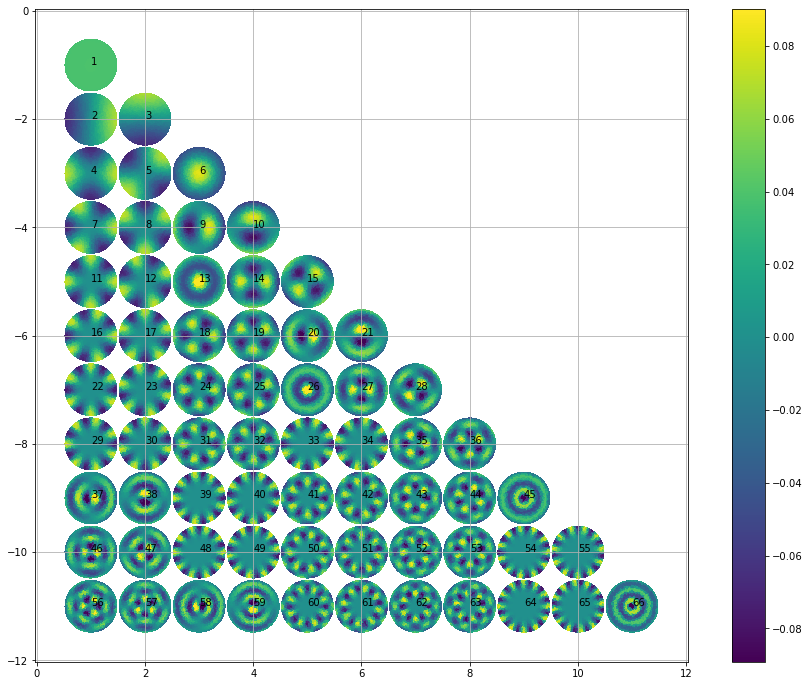

In [115]:
i = 4
KL = modes['outer'][f"KL_{i}"]
xyz = np.vstack(df[f'S{i}'])
xi = xyz[:,0]
yi = xyz[:,1]
vmin = KL[:n,:].min()
vmax = KL[:n,].max()
fig,ax = plt.subplots(figsize=[16,12])
k = 0
for i in range(11):
    for j in range(0,i+1): 
        h=ax.tripcolor(xi/D+j+1,yi/D-i-1,KL[:,k],vmin=vmin,vmax=vmax)
        k += 1
        ax.text(j+1,-i-1,f'{k}')
ax.set_aspect('equal')
ax.grid()
fig.colorbar(h,ax=ax)


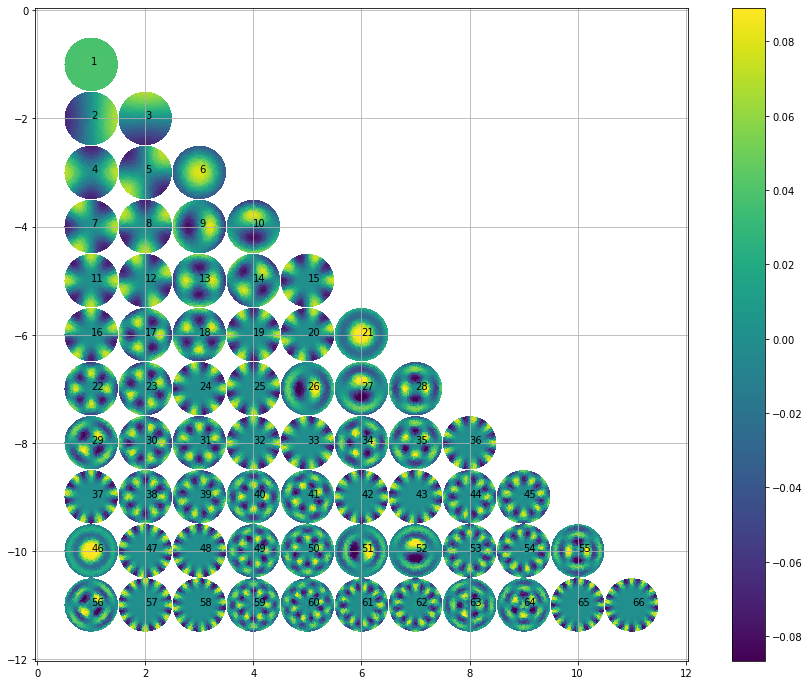

In [119]:
i = 7
KL = modes['center'][f"KL_{i}"]
xyz = np.vstack(df[f'S{i}'])
xi = xyz[:,0]
yi = xyz[:,1]
vmin = KL[:n,:].min()
vmax = KL[:n,].max()
fig,ax = plt.subplots(figsize=[16,12])
k = 0
for i in range(11):
    for j in range(0,i+1): 
        h=ax.tripcolor(xi/D+j+1,yi/D-i-1,KL[:,k],vmin=vmin,vmax=vmax)
        k += 1
        ax.text(j+1,-i-1,f'{k}')
ax.set_aspect('equal')
ax.grid()
fig.colorbar(h,ax=ax)


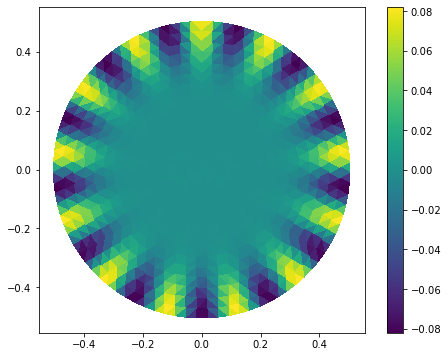

In [78]:
l = -1
fig,ax = plt.subplots(figsize=[8,6])
h=ax.tripcolor(xi,yi,KL[:,l])
ax.set_aspect("equal")
fig.colorbar(h,ax=ax)

In [50]:
0.039*2*1e3

78.0

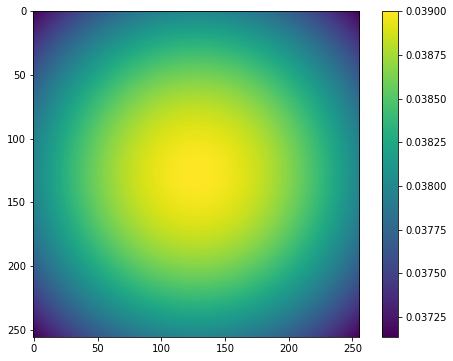

In [120]:
fig,ax = plt.subplots(figsize=[8,6])
h=ax.imshow(CEO_KL['outer'].CEO_KL[0])
ax.set_aspect("equal")
fig.colorbar(h,ax=ax)

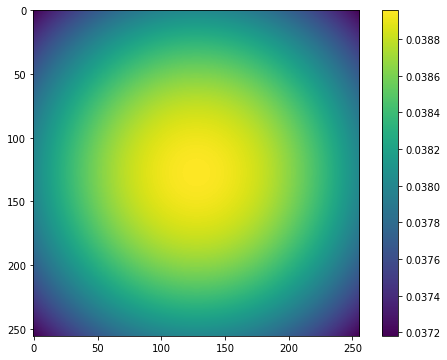

In [121]:
fig,ax = plt.subplots(figsize=[8,6])
h=ax.imshow(CEO_KL['center'].CEO_KL[0])
ax.set_aspect("equal")
fig.colorbar(h,ax=ax)

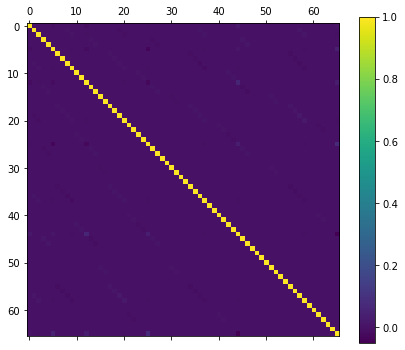

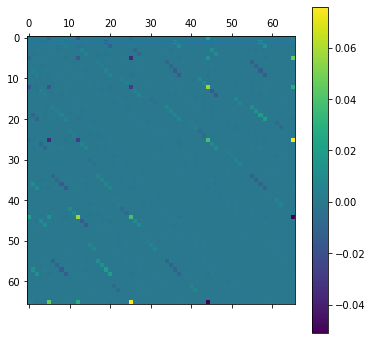

In [123]:
B = modes['outer']["KL_1"]
fig,ax = plt.subplots(figsize=(7,6))
h=ax.matshow(B.T@B)
fig.colorbar(h,ax=ax)
fig,ax = plt.subplots(figsize=(6,6))
h=ax.matshow(B.T@B - np.eye(n))
fig.colorbar(h,ax=ax)
plt.plot(np.diag(B.T@B))

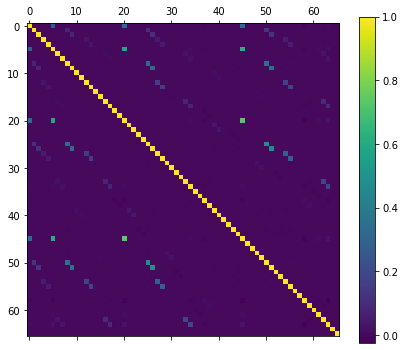

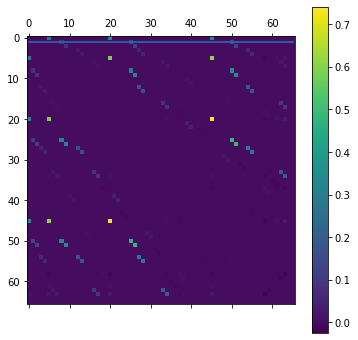

In [124]:
B = modes['center']["KL_7"]
fig,ax = plt.subplots(figsize=(7,6))
h=ax.matshow(B.T@B)
fig.colorbar(h,ax=ax)
fig,ax = plt.subplots(figsize=(6,6))
h=ax.matshow(B.T@B - np.eye(n))
fig.colorbar(h,ax=ax)
plt.plot(np.diag(B.T@B))

In [92]:
mixed_modes = modes['outer']
mixed_modes['KL_7'] = modes['center']['KL_7']
savemat("KLmodes.mat",mixed_modes)

In [125]:
suit = OrderedDict()
suit['Ni']     = np.array( 256,     dtype=np.int32)
suit['L']      = np.array( 1.05,     dtype=np.double)
suit['N_SET']  = np.array( 2,     dtype=np.int32)
suit['N_MODE'] = np.array( n,     dtype=np.int32)
suit['s2b']    = np.array( [0]*6+[1], dtype=np.int32)
suit['M'] = np.dstack(CEO_KL['outer'].CEO_KL[:n]+CEO_KL['center'].CEO_KL[:n]).flatten(order='F')
path_to_modes  = 'M2_OrthoNorm_KarhunenLoeveModes.ceo'
with open(path_to_modes,'w') as f:
    for key in suit:
        suit[key].tofile(f)

In [126]:
suit

OrderedDict([('Ni', array(256, dtype=int32)),
             ('L', array(1.05)),
             ('N_SET', array(2, dtype=int32)),
             ('N_MODE', array(66, dtype=int32)),
             ('s2b', array([0, 0, 0, 0, 0, 0, 1], dtype=int32)),
             ('M',
              array([ 0.03713781,  0.03714961,  0.03716138, ..., -1.52519327,
                     -1.70274552, -1.88814044]))])

In [103]:
1/np.sqrt(675)

0.03849001794597505

In [73]:
B.shape,B[:,0].mean(),np.sqrt(675)*B[:,0].mean(),

((675, 153), 0.03848894438269717, 0.9999721080078636)

In [64]:
Q, R = np.linalg.qr(B)

In [67]:
Q.shape,Q[:,0].mean()

((675, 153), -0.03848894438269717)

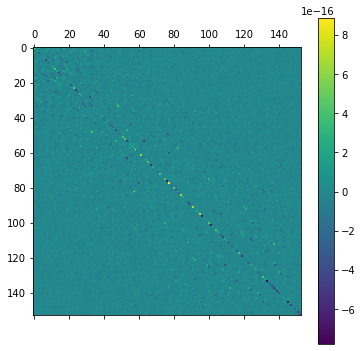

In [68]:
fig,ax = plt.subplots(figsize=(6,6))
h=ax.matshow(Q.T@Q - np.eye(n))
fig.colorbar(h,ax=ax)

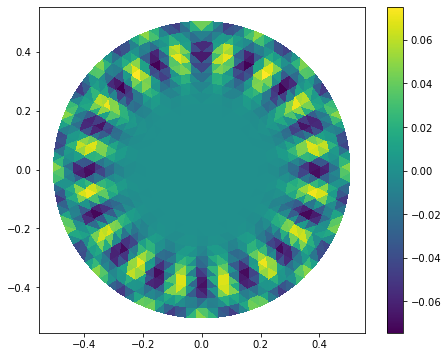

In [69]:
l = -1
fig,ax = plt.subplots(figsize=[8,6])
h=ax.tripcolor(xi,yi,Q[:,l])
ax.set_aspect("equal")
fig.colorbar(h,ax=ax)

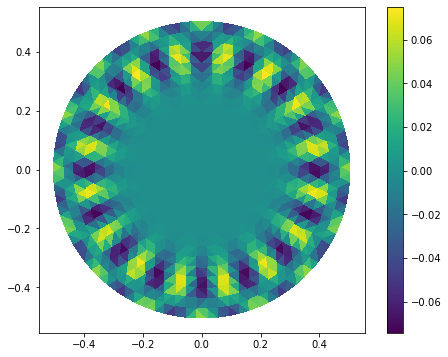

In [70]:
l = -1
fig,ax = plt.subplots(figsize=[8,6])
h=ax.tripcolor(xi,yi,KL[:,l])
ax.set_aspect("equal")
fig.colorbar(h,ax=ax)